# Tomato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2024-07-11 18:25:48.365943: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 18:25:49.863333: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 18:25:51.128709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 18:25:52.105506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 18:25:52.109505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 18:26:02.285214: W tensorflow/compiler/tf2tensorrt/utils/py_utils

### Import data into tensorflow dataset object

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 11203 images belonging to 10 classes.


In [7]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [11]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6155299  0.55670637 0.5684711 ]
  [0.61356336 0.55473983 0.56650454]
  [0.6115968  0.5527733  0.564538  ]
  ...
  [0.55172944 0.49290588 0.5046706 ]
  [0.5062326  0.4474091  0.4591738 ]
  [0.525412   0.4665885  0.4783532 ]]

 [[0.6349439  0.5761204  0.5878851 ]
  [0.63248575 0.5736622  0.5854269 ]
  [0.63002765 0.5712041  0.58296883]
  ...
  [0.54582983 0.4870063  0.498771  ]
  [0.5086908  0.44986722 0.46163192]
  [0.5244287  0.46560523 0.47736993]]

 [[0.63529414 0.5764706  0.5882353 ]
  [0.63529414 0.5764706  0.5882353 ]
  [0.63529414 0.5764706  0.5882353 ]
  ...
  [0.5399303  0.48110676 0.49287146]
  [0.51114887 0.45232537 0.46409008]
  [0.5234455  0.46462196 0.47638667]]

 ...

 [[0.5766385  0.517815   0.53742284]
  [0.53239334 0.47356984 0.49317768]
  [0.543183   0.48435947 0.50396734]
  ...
  [0.5489282  0.49010465 0.5097125 ]
  [0.5400788  0.4812553  0.50086313]
  [0.5312295  0.47240597 0.4920138 ]]

 [[0.574672   0.51584846 0.5354563 ]
  [0.5255105  0.46668702 0.48629487]


In [13]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [15]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3211 images belonging to 10 classes.


In [17]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6550353  0.6040549  0.63934904]
  [0.6528745  0.60189414 0.63718826]
  [0.6505805  0.59960014 0.63489425]
  ...
  [0.6471119  0.5961315  0.6235825 ]
  [0.65875006 0.60776967 0.63522065]
  [0.6626785  0.6116981  0.63914907]]

 [[0.6624758  0.61149544 0.64678955]
  [0.6616471  0.6106667  0.6459608 ]
  [0.66050005 0.60951966 0.6448138 ]
  ...
  [0.64883244 0.597852   0.625303  ]
  [0.65937257 0.6083922  0.63584316]
  [0.6627451  0.6117647  0.6392157 ]]

 [[0.6198023  0.5688219  0.604116  ]
  [0.62611085 0.57513046 0.6104246 ]
  [0.63241947 0.5814391  0.6167332 ]
  ...
  [0.6505529  0.59957254 0.6270235 ]
  [0.6599461  0.6089657  0.6364167 ]
  [0.6627451  0.6117647  0.6392157 ]]

 ...

 [[0.45802376 0.39920023 0.4266512 ]
  [0.45826957 0.39944604 0.42689702]
  [0.42181948 0.36299592 0.3904469 ]
  ...
  [0.51256084 0.4537373  0.47334513]
  [0.5131343  0.4543108  0.47391865]
  [0.5137079  0.4548843  0.47449216]]

 [[0.46261182 0.4037883  0.43123928]
  [0.45654905 0.3977255  0.4251765 ]


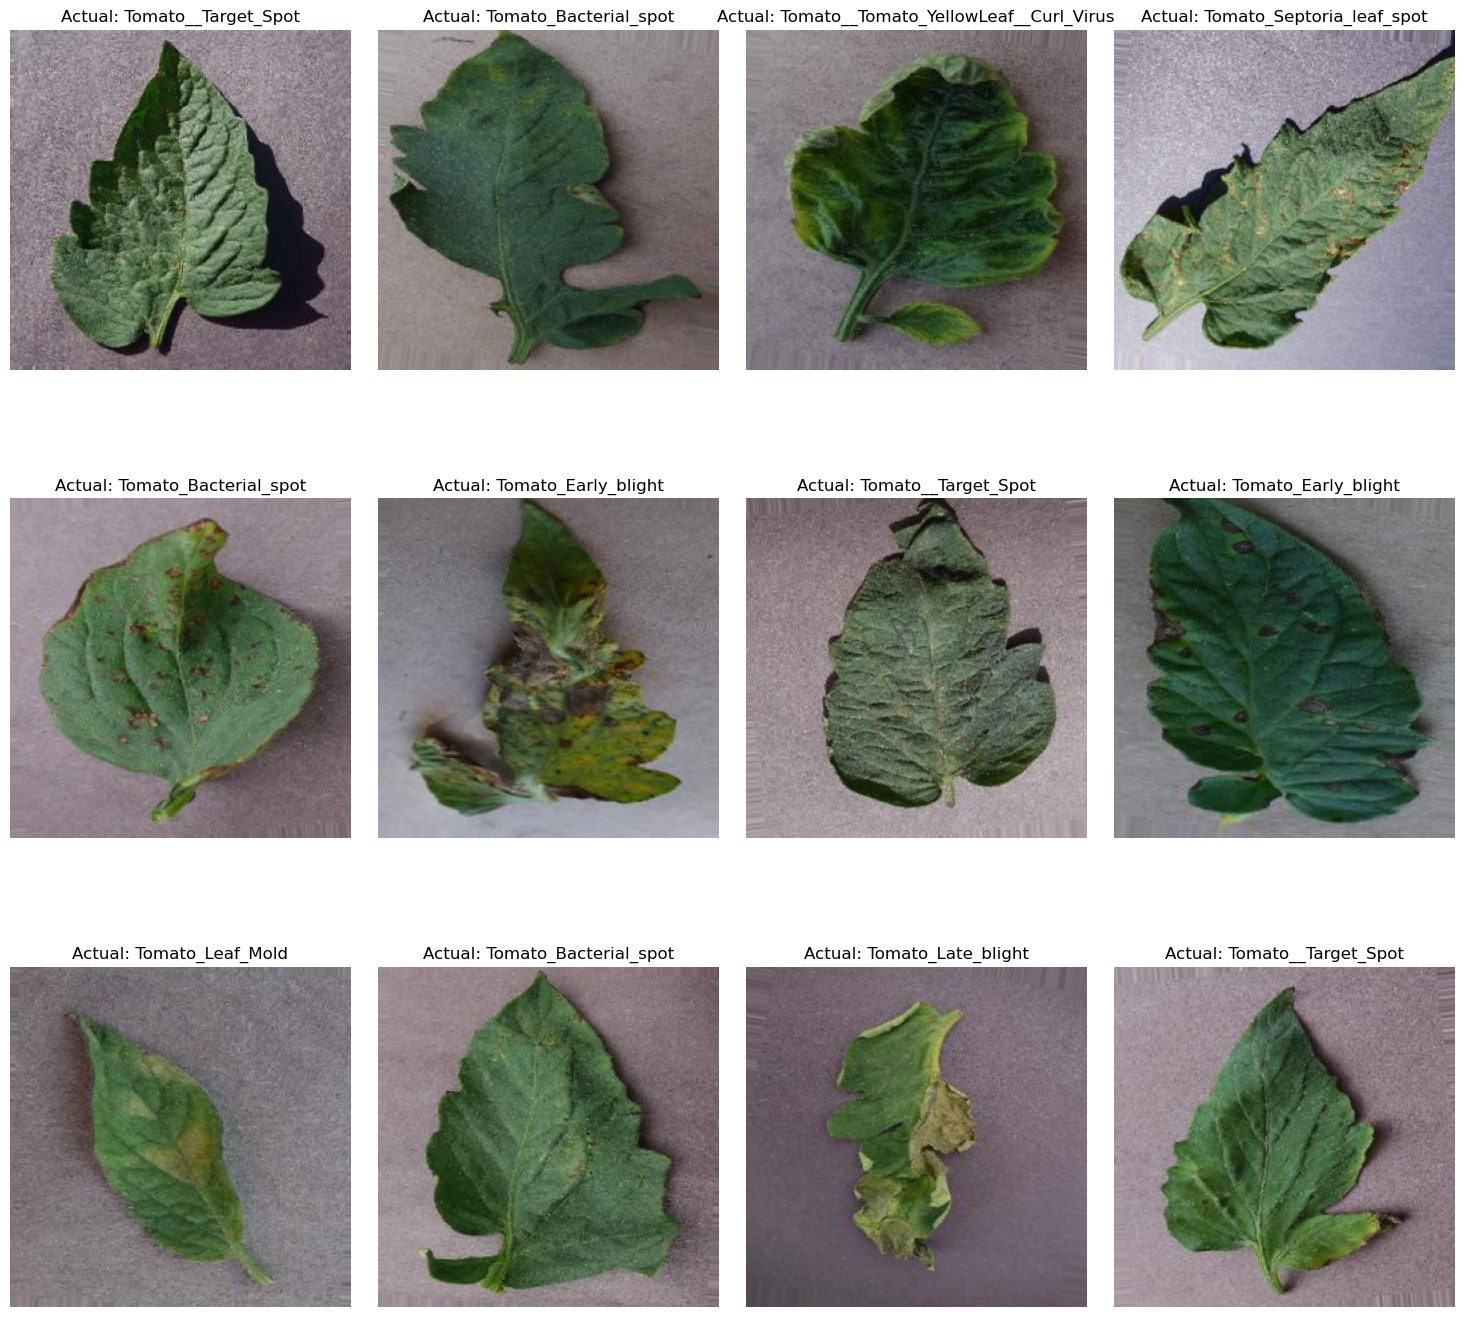

In [84]:
plt.figure(figsize=(15, 15))
images, labels = next(train_generator)

for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    
    actual_class = class_names[int(labels[i])]
    
    plt.title(f"Actual: {actual_class}", fontsize=12)
    
    plt.axis("off")
    
plt.tight_layout(pad=2.0)
plt.show()


## Building the Model

In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/home/lk/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
11203/32

350.09375

In [29]:
1597/32

49.90625

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=49,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30


/home/lk/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-11 18:28:47.518085: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-07-11 18:28:49.773876: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


  1/350 ━━━━━━━━━━━━━━━━━━━━ 1:02:45 11s/step - accuracy: 0.1250 - loss: 2.3006

2024-07-11 18:28:50.230410: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-07-11 18:28:51.412214: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


  2/350 ━━━━━━━━━━━━━━━━━━━━ 9:37 2s/step - accuracy: 0.1250 - loss: 2.2982    

2024-07-11 18:28:51.888899: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


350/350 ━━━━━━━━━━━━━━━━━━━━ 61224s 175s/step - accuracy: 0.3036 - loss: 1.8958 - val_accuracy: 0.6805 - val_loss: 0.9297
Epoch 2/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 10:55 2s/step - accuracy: 0.7188 - loss: 0.8817

2024-07-12 11:29:05.856704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/lk/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7188 - loss: 0.8817 - val_accuracy: 0.4483 - val_loss: 1.2731
Epoch 3/30


2024-07-12 11:29:08.355913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7022 - loss: 0.8733 - val_accuracy: 0.7634 - val_loss: 0.6996
Epoch 4/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:30 2s/step - accuracy: 0.8125 - loss: 0.5606

2024-07-12 11:39:23.315988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8125 - loss: 0.5606 - val_accuracy: 0.5862 - val_loss: 0.9973
Epoch 5/30


2024-07-12 11:39:23.719223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 626s 2s/step - accuracy: 0.7952 - loss: 0.5828 - val_accuracy: 0.8489 - val_loss: 0.4379
Epoch 6/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:00 2s/step - accuracy: 0.9062 - loss: 0.3097

2024-07-12 11:49:51.208577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.3097 - val_accuracy: 0.7586 - val_loss: 0.8139
Epoch 7/30


2024-07-12 11:49:51.617485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 614s 2s/step - accuracy: 0.8360 - loss: 0.4544 - val_accuracy: 0.8718 - val_loss: 0.3727
Epoch 8/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:40 2s/step - accuracy: 0.8438 - loss: 0.4553

2024-07-12 12:00:07.079643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.4553 - val_accuracy: 0.8966 - val_loss: 0.2231
Epoch 9/30


2024-07-12 12:00:07.761278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.8737 - loss: 0.3592 - val_accuracy: 0.8744 - val_loss: 0.3888
Epoch 10/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:41 2s/step - accuracy: 0.8750 - loss: 0.4612

2024-07-12 12:11:11.038614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.4612 - val_accuracy: 0.9655 - val_loss: 0.1690
Epoch 11/30


2024-07-12 12:11:11.503443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 635s 2s/step - accuracy: 0.8917 - loss: 0.3019 - val_accuracy: 0.9101 - val_loss: 0.2720
Epoch 12/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 11:04 2s/step - accuracy: 1.0000 - loss: 0.0813

2024-07-12 12:21:48.124625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0813 - val_accuracy: 0.8966 - val_loss: 0.2761
Epoch 13/30


2024-07-12 12:21:48.546212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.9040 - loss: 0.2778 - val_accuracy: 0.9126 - val_loss: 0.2659
Epoch 14/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 10:02 2s/step - accuracy: 0.8438 - loss: 0.4730

2024-07-12 12:31:47.723789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8438 - loss: 0.4730 - val_accuracy: 0.8276 - val_loss: 0.3144
Epoch 15/30


2024-07-12 12:31:48.143943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 639s 2s/step - accuracy: 0.9159 - loss: 0.2440 - val_accuracy: 0.9381 - val_loss: 0.1935
Epoch 16/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:11 2s/step - accuracy: 0.8750 - loss: 0.2805

2024-07-12 12:42:28.611337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.2805 - val_accuracy: 0.9310 - val_loss: 0.1925
Epoch 17/30


2024-07-12 12:42:29.016087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - accuracy: 0.9312 - loss: 0.2054 - val_accuracy: 0.9324 - val_loss: 0.2113
Epoch 18/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:11 2s/step - accuracy: 0.9688 - loss: 0.0670

2024-07-12 12:53:19.885741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9688 - loss: 0.0670 - val_accuracy: 0.8966 - val_loss: 0.1874
Epoch 19/30


2024-07-12 12:53:20.293971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 612s 2s/step - accuracy: 0.9298 - loss: 0.2058 - val_accuracy: 0.9254 - val_loss: 0.2528
Epoch 20/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:20 2s/step - accuracy: 0.9688 - loss: 0.1456

2024-07-12 13:03:34.252468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9688 - loss: 0.1456 - val_accuracy: 0.8966 - val_loss: 0.2577
Epoch 21/30


2024-07-12 13:03:34.714733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.9273 - loss: 0.2028 - val_accuracy: 0.8782 - val_loss: 0.4333
Epoch 22/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 10:09 2s/step - accuracy: 0.9062 - loss: 0.3400

2024-07-12 13:13:44.206989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3400 - val_accuracy: 0.8276 - val_loss: 0.8082
Epoch 23/30


2024-07-12 13:13:44.670917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 622s 2s/step - accuracy: 0.9298 - loss: 0.1996 - val_accuracy: 0.9349 - val_loss: 0.2099
Epoch 24/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:24 2s/step - accuracy: 1.0000 - loss: 0.0451

2024-07-12 13:24:07.901728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 0.0496
Epoch 25/30


2024-07-12 13:24:08.322450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 636s 2s/step - accuracy: 0.9501 - loss: 0.1476 - val_accuracy: 0.9356 - val_loss: 0.2139
Epoch 26/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:15 2s/step - accuracy: 1.0000 - loss: 0.0430

2024-07-12 13:34:45.745236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0301
Epoch 27/30


2024-07-12 13:34:46.208917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 716s 2s/step - accuracy: 0.9557 - loss: 0.1261 - val_accuracy: 0.9381 - val_loss: 0.1932
Epoch 28/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:34 2s/step - accuracy: 0.9688 - loss: 0.0996

2024-07-12 13:46:43.819606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.0996 - val_accuracy: 0.9655 - val_loss: 0.0931
Epoch 29/30


2024-07-12 13:46:44.380679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 653s 2s/step - accuracy: 0.9492 - loss: 0.1441 - val_accuracy: 0.8827 - val_loss: 0.4184
Epoch 30/30
  1/350 ━━━━━━━━━━━━━━━━━━━━ 9:22 2s/step - accuracy: 0.9375 - loss: 0.1810

2024-07-12 13:57:39.500711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.1810 - val_accuracy: 0.9655 - val_loss: 0.1635


2024-07-12 13:57:39.935848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [33]:
scores = model.evaluate(test_generator)

101/101 ━━━━━━━━━━━━━━━━━━━━ 92s 907ms/step - accuracy: 0.8865 - loss: 0.4359


In [35]:
scores

[0.46354860067367554, 0.8838368058204651]

### Plotting the Accuracy and Loss Curves

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 350}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [43]:
type(history.history['loss'])

list

In [45]:
len(history.history['loss'])

30

In [47]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.5622913837432861,
 0.8817247152328491,
 0.7804171442985535,
 0.5606361627578735,
 0.5503923296928406]

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [51]:
val_acc

[0.6804847121238708,
 0.4482758641242981,
 0.7633928656578064,
 0.5862069129943848,
 0.8488520383834839,
 0.7586206793785095,
 0.8718112111091614,
 0.8965517282485962,
 0.8743622303009033,
 0.9655172228813171,
 0.9100765585899353,
 0.8965517282485962,
 0.9126275777816772,
 0.8275862336158752,
 0.9381377696990967,
 0.931034505367279,
 0.9323979616165161,
 0.8965517282485962,
 0.925382673740387,
 0.8965517282485962,
 0.8781887888908386,
 0.8275862336158752,
 0.9349489808082581,
 1.0,
 0.9355867505073547,
 1.0,
 0.9381377696990967,
 0.9655172228813171,
 0.8826530575752258,
 0.9655172228813171]

In [53]:
acc

[0.44060513377189636,
 0.71875,
 0.730820894241333,
 0.8125,
 0.8055679798126221,
 0.90625,
 0.8378838300704956,
 0.84375,
 0.872974693775177,
 0.875,
 0.890609622001648,
 1.0,
 0.9069017767906189,
 0.84375,
 0.9153164625167847,
 0.875,
 0.9269537329673767,
 0.96875,
 0.9277593493461609,
 0.96875,
 0.9343836903572083,
 0.90625,
 0.9363530278205872,
 1.0,
 0.9481693506240845,
 1.0,
 0.9520186185836792,
 0.96875,
 0.9508548974990845,
 0.9375]

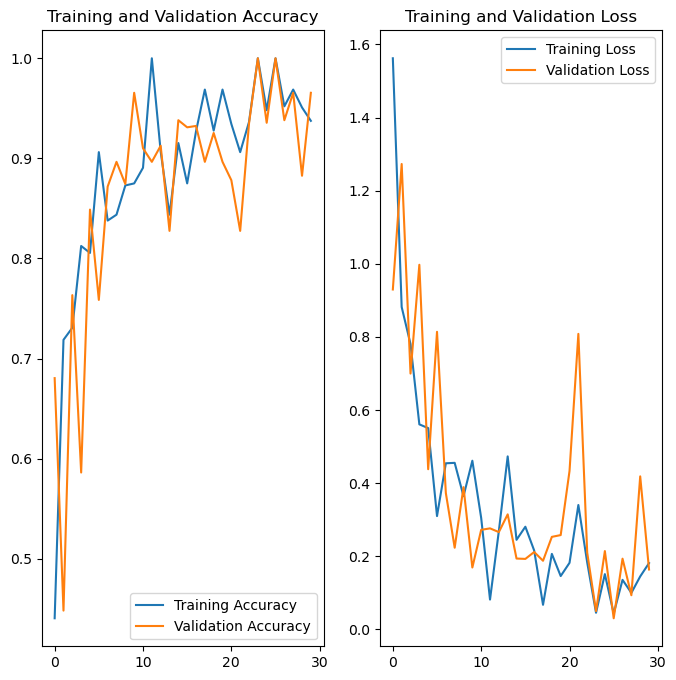

In [55]:
EPOCHS = EPOCHS

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Septoria_leaf_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Tomato_Septoria_leaf_spot


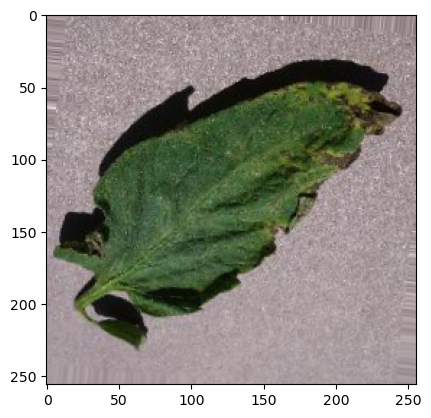

In [61]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


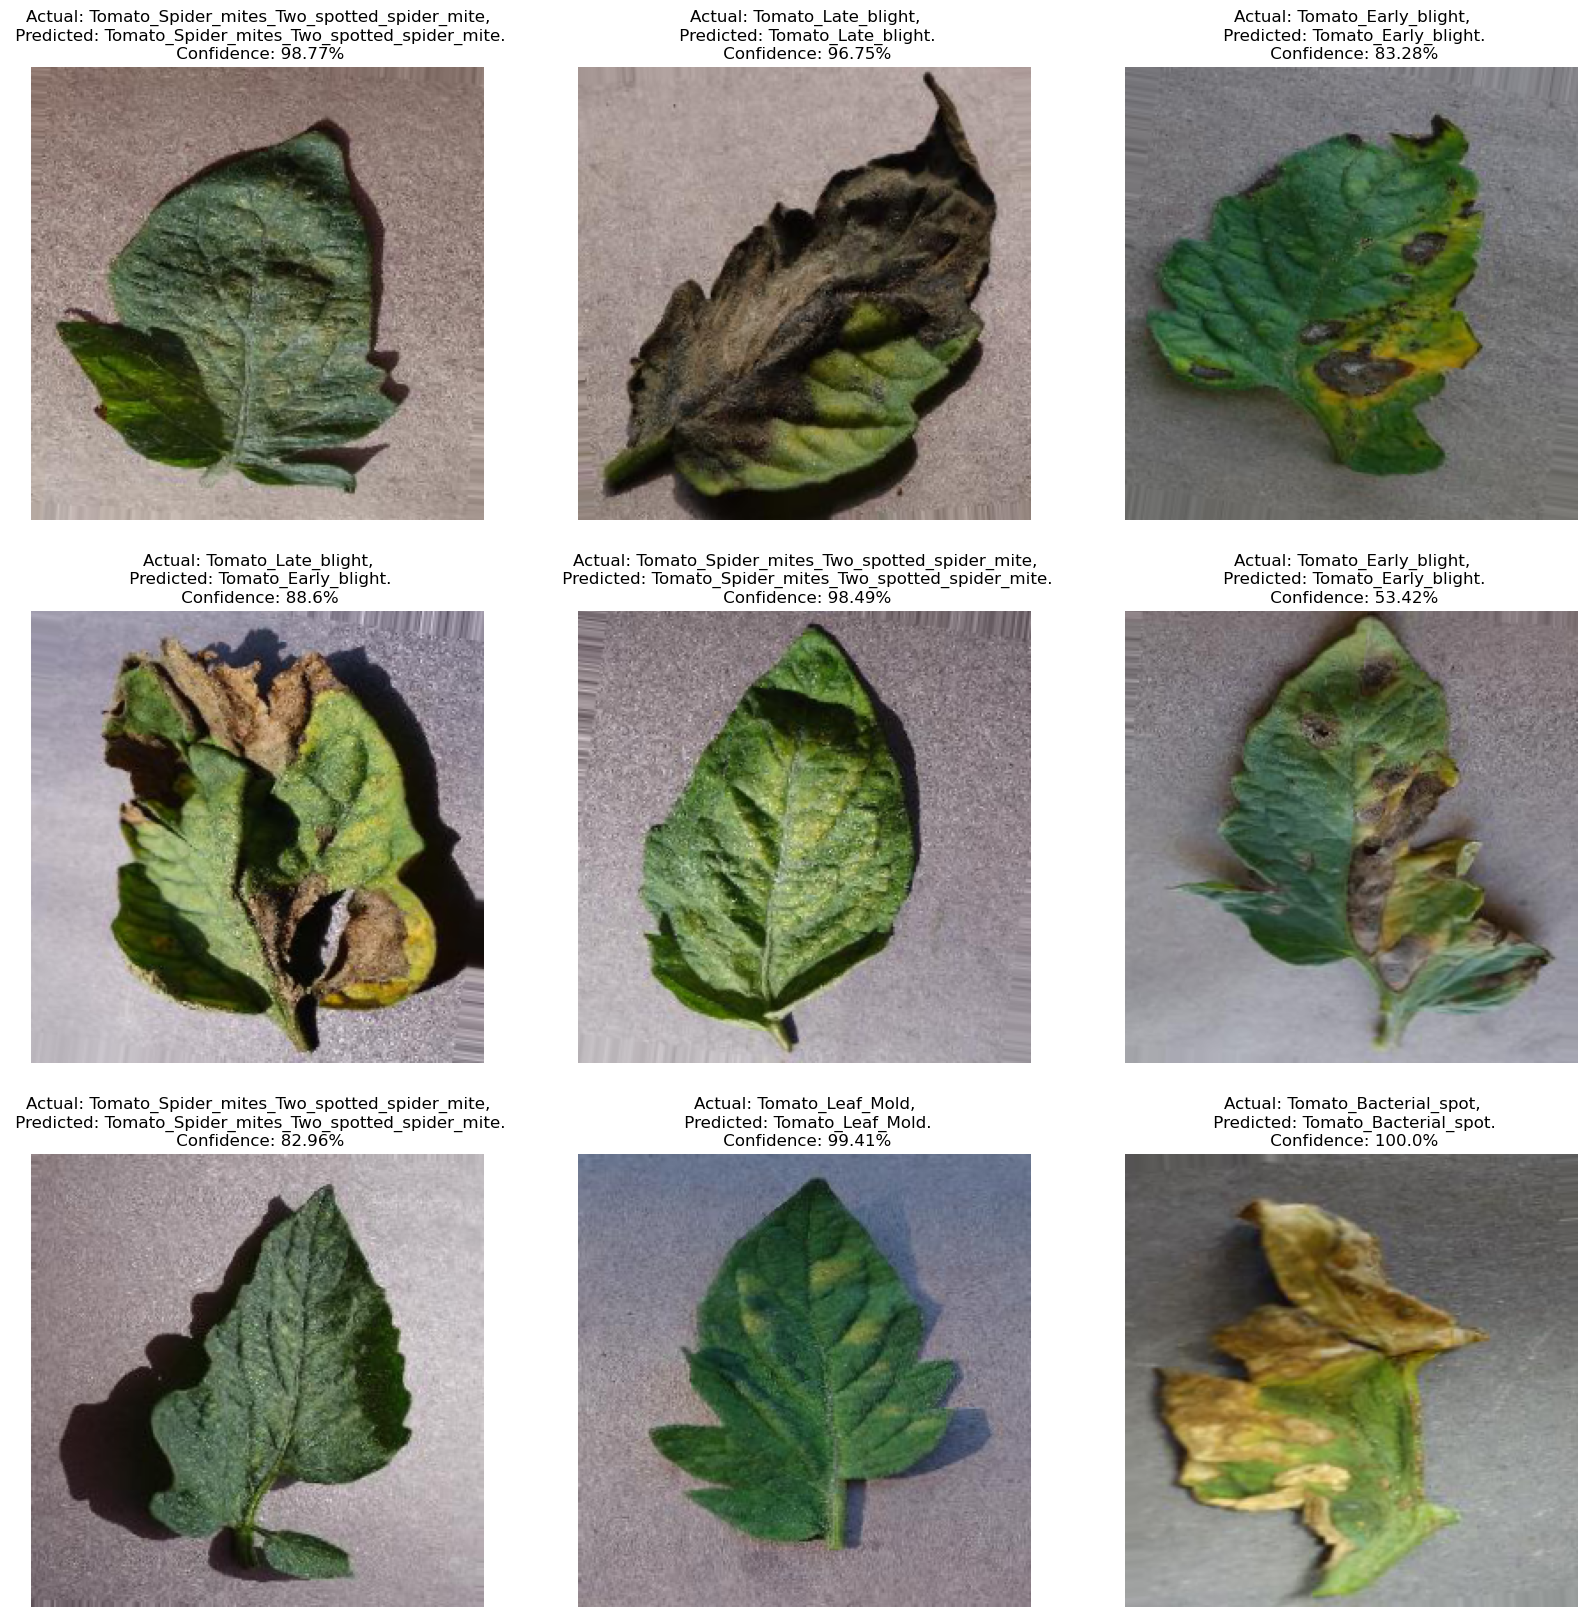

In [88]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [89]:
model.save("../saved_models/model.keras")